<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-02-17 19:58:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  45.9MB/s    in 0.8s    

2022-02-17 19:58:05 (45.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

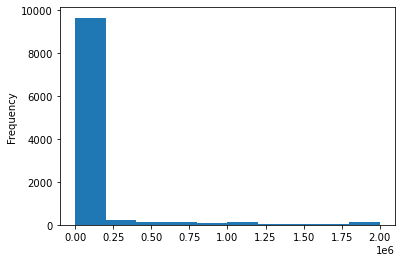

In [8]:
# your code goes here
df = pd.read_sql_query("SELECT * FROM master", conn)
df['ConvertedComp'].plot(kind = 'hist')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

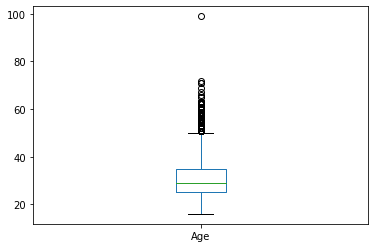

In [9]:
# your code goes here
df = pd.read_sql_query("SELECT * FROM master", conn)
df['Age'].plot(kind = 'box')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

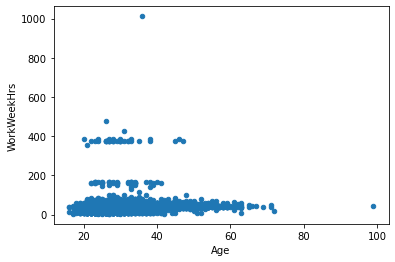

In [10]:
# your code goes here
df = pd.read_sql_query("SELECT * FROM master", conn)
df.plot(x= 'Age', y = 'WorkWeekHrs', kind = 'scatter')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

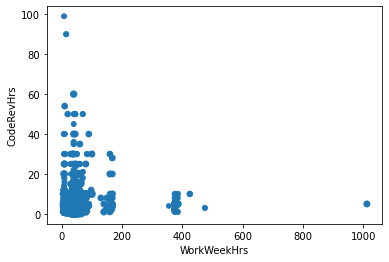

In [11]:
# your code goes here
import matplotlib.pyplot as plt
df = pd.read_sql_query("SELECT * FROM master", conn)
df.plot(kind = 'scatter', x = 'WorkWeekHrs', y = 'CodeRevHrs', s = 'Age')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


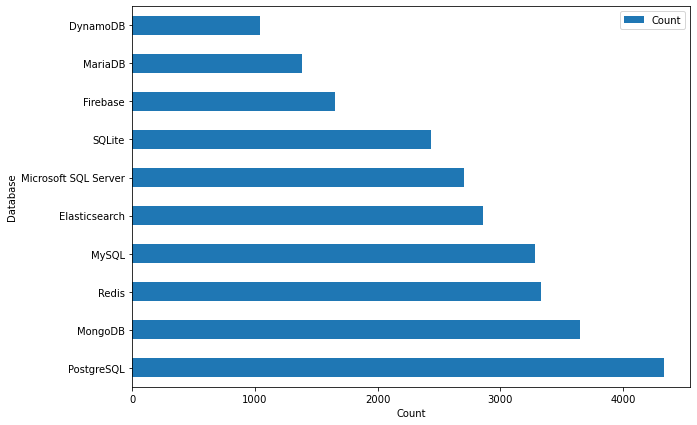

,Database,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [32]:
# your code goes here
#df = pd.read_sql_query(
#    "SELECT DatabaseDesireNextYear as Database, COUNT(DatabaseDesireNextYear) as Count\
#     FROM DatabaseDesireNextYear\
#     GROUP BY DatabaseDesireNextYear\#     ORDER BY COUNT DESC\
#     LIMIT 5"
#     , conn)
#databases = df['Database']
#data = df['Count']
#fig = plt.figure(figsize =(10,7))
#plt.pie(data, labels = databases, autopct='%1.1f%%', shadow = True)
#plt.show()


df = pd.read_sql_query(
    "SELECT DatabaseDesireNextYear as Database, COUNT(DatabaseDesireNextYear) as Count\
     FROM DatabaseDesireNextYear\
     GROUP BY DatabaseDesireNextYear\
     ORDER BY COUNT DESC\
     LIMIT 10"
     , conn)

df.plot(x = 'Database', y = 'Count', kind = 'barh', figsize =(10,7))
plt.xlabel('Count')
plt.show()
df.head()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


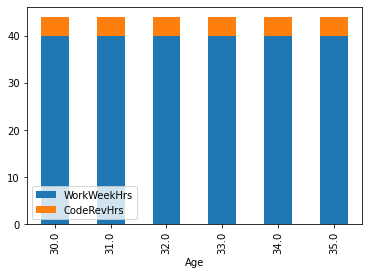

In [82]:
# your code goes here
import numpy as np
df = pd.read_sql_query(
    "SELECT WorkWeekHrs, CodeRevHrs, Age\
     FROM master"
     ,conn)
df1 = df.groupby(['Age']).agg({'WorkWeekHrs':'median'})
df2 = df.groupby(['Age']).agg({'CodeRevHrs':'median'})
df3 = df1[30:35]
df4 = df2[30:35]
df5 = df3.merge(df4, on = 'Age', how = 'outer')
df5.plot(kind = 'bar', stacked = True)
plt.legend()
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


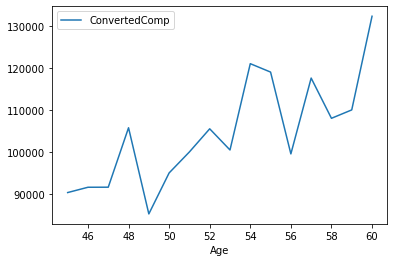

In [128]:
#your code goes here
df = pd.read_sql_query(
    "SELECT ConvertedComp, Age\
     FROM master"
     ,conn)
df1 = df.groupby(['Age']).agg({'ConvertedComp':'median'})
df2 = df1[45:60]
df2.plot(kind = 'line')
plt.legend()
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


(array([0, 1]),
 [Text(0, 0, '(I am a developer by profession,)'),
  Text(1, 0, '(I am not primarily a developer, but I write code sometimes as part of my work,)')])

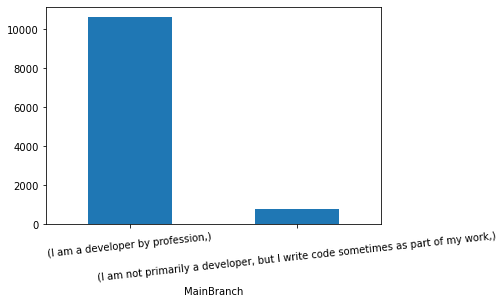

In [100]:
# your code goes here
df = pd.read_sql_query(
    "SELECT MainBranch\
     FROM master"
     ,conn)
df.value_counts().plot(kind = 'bar')

Close the database connection.


In [101]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
